In [34]:
import pandas as pd

fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Training과 Test Set로 분리

In [35]:
train_input = fruits.loc[:34, ['length', 'weight']]
train_input.tail()

,length,weight
30,38.5,920.0
31,38.5,955.0
32,39.5,925.0
33,41.0,975.0
34,41.0,950.0


In [36]:
train_target = fruits.loc[:34, 'name']
train_target.tail()

30    apple
31    apple
32    apple
33    apple
34    apple
Name: name, dtype: object

In [37]:
# 데이터 크기 맞는지 확인 
len(train_input) == len(train_target)

True

#### Test

In [38]:
test_input = fruits.loc[35:, ['length', 'weight']]
test_input.tail()

,length,weight
44,12.2,12.2
45,12.4,13.4
46,13.0,12.2
47,14.3,19.7
48,15.0,19.9


In [39]:
test_target = fruits.loc[35:, ['name']]
test_target.tail()

,name
44,berry
45,berry
46,berry
47,berry
48,berry


In [40]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [41]:
kn = KNeighborsClassifier()

In [42]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [43]:
kn.score(test_input, test_target)

0.0

In [44]:
train_target

0     apple
1     apple
2     apple
3     apple
4     apple
5     apple
6     apple
7     apple
8     apple
9     apple
10    apple
11    apple
12    apple
13    apple
14    apple
15    apple
16    apple
17    apple
18    apple
19    apple
20    apple
21    apple
22    apple
23    apple
24    apple
25    apple
26    apple
27    apple
28    apple
29    apple
30    apple
31    apple
32    apple
33    apple
34    apple
Name: name, dtype: object

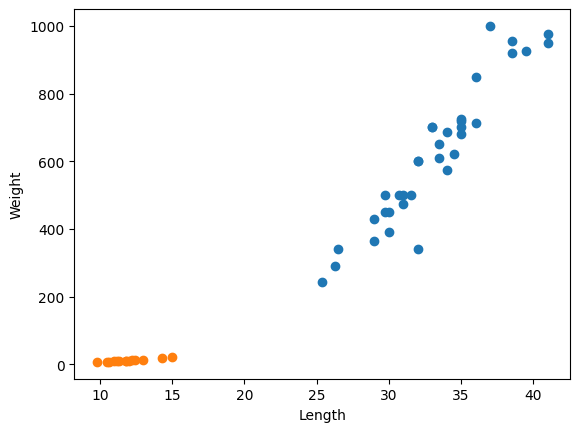

In [45]:
plt.scatter(train_input.length, train_input.weight)
plt.scatter(test_input.length, test_input.weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

## Sampling 편향이 발생하였다

### Numpy를 이용하여 샘플링 편향 제거하기

In [46]:
import numpy as np

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)       # 0~48 숫자 섞기
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [47]:
index[:35]  #numpy

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [48]:
# index는  numpy 라서 pandas인 loc가 모르므로 list로 변환 후 loc에 사용
train_input = fruits.loc[list(index[:35]), ['length','weight']]
train_input.head()

,length,weight
13,32.0,340.0
45,12.4,13.4
47,14.3,19.7
44,12.2,12.2
17,33.0,700.0


In [49]:
train_target = fruits.loc[list(index[:35]), 'name']
train_target.head()

13    apple
45    berry
47    berry
44    berry
17    apple
Name: name, dtype: object

In [50]:
len(train_input) == len(train_target)

True

In [51]:
# test
test_input = fruits.loc[list(index[:35]),['length', 'weight']]
test_input.head()

,length,weight
13,32.0,340.0
45,12.4,13.4
47,14.3,19.7
44,12.2,12.2
17,33.0,700.0


In [52]:
test_target = fruits.loc[list(index[:35]),['name']]
test_target.head()

,name
13,apple
45,berry
47,berry
44,berry
17,apple


In [53]:
len(test_input) == len(test_target)

True

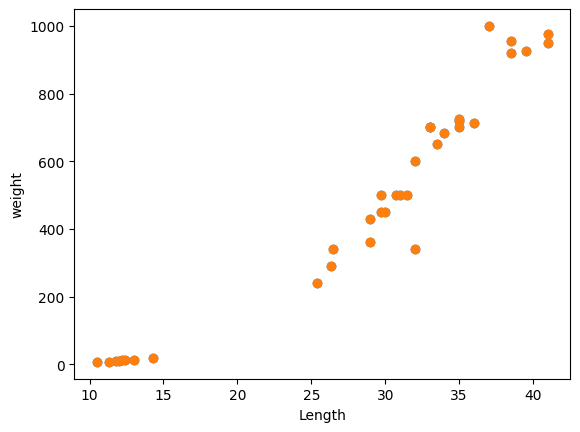

In [54]:
plt.scatter(test_input.length, test_input.weight)
plt.scatter(train_input.length, train_input.weight)
plt.xlabel('Length')
plt.ylabel('weight')
plt.show()

In [55]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

---
## scikit-learn을 이용

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train_input, test_input, train_target, test_target = \
    train_test_split(fruits[['length','weight']], fruits['name'], random_state=42)

In [58]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [59]:
# 빈도수 세기
import collections

collections.Counter[test_target]

collections.Counter[13    apple
45    berry
47    berry
44    berry
17    apple
27    apple
26    apple
25    apple
31    apple
19    apple
12    apple
4     apple
34    apple
Name: name, dtype: object]

In [60]:
collections.Counter(test_target)

Counter({'apple': 10, 'berry': 3})

In [61]:
# apple과 berry의 비율
len(fruits[fruits['name']=='apple']) / len(fruits[fruits['name']=='berry'])

2.5

In [62]:
10 / 3

3.3333333333333335

> apple과 berry의 비율이 비슷하게 할 피요 있다. <- sampling의 기본

In [67]:
train_input, test_input, train_target, test_target = \
    train_test_split(fruits[['length','weight']], fruits['name'], 
                     random_state=42, stratify=fruits['name']) #name의 비율 맞춰주는 옵션 stratify ⭐️

In [64]:
collections.Counter(test_target)

Counter({'apple': 9, 'berry': 4})

In [65]:
9/4

2.25

In [66]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.6153846153846154

### 의사 결정 나무